<h2> PROYECTO - Aprendizaje No Supervisado<h2>

<h2>Integrantes:<h2>
<h3>- Maximiliano Zapater Cornejo<h3>
<h3>- Javiera Vukasovic Figueroa<h3>
<h3>- Sebastián Silva Espinoza<h3>
<h3>- Glen Restrepo Arteaga<h3>
<h3>- Marco Gutiérrez Corvalán<h3>

Utilizaremos un dataset para estimación de los niveles de obesidad según los hábitos alimenticios y condiciones físicas en 2111 personas de Colombia, Perú y México. 

**El dataset contiene los siguientes atributos**:

* Gender (*binario*): Género [*Female/Male*]

* Age (*numérico continuo*): Edad 
* Height (*numérico continuo*): Altura [*metros*]
* Weight (*numérico continuo)*: Peso [*kilogramos*]
* Family history with overweight (*binario*): ¿Algún miembro de la familia ha sufrido o sufre de sobrepeso?
* FAVC (*binario*): ¿Comes alimentos altos en calorías frecuentemente?
* FCVC (*numérico entero*): ¿Usualmente comes vegetales en tus comidas principales? [*Never/Sometimes/Always*]
* NCP (*numérico continuo*): ¿Cuántas comidas principales consumes diariamente? [*Between 1 and 2/Three/More than three*]
* CAEC (*categórica*): ¿Comes algún alimento entre comidas principales? [*No/Sometimes/Frequently/Always*]
* SMOKE (*binario*): ¿Fumas?
* CH2O (*numérico continuo*): ¿Cuánta agua bebes diariamente? [*Less than a liter/Between 1 and 2L/More than 2L*]
* SCC (*binario*): ¿Monitoreas las calorías que consumes diariamente?
* FAF (*numérico continuo*): ¿Qué tan seguido realizas actividad física? [*I do not have/1 or 2 days/2 or 4 days/4 or 5 days*]
* TUE (*numérico entero*): ¿Cuánto tiempo usas aparatos electrónicos tales como celular, videojuegos, televisión, computadora u otros?
* CALC (*categórica*): ¿Qué tan seguido bebes alcohol? [*I do not drink/Sometimes/Frequently/Always*]
* MTRANS (*categórica*): ¿Qué medio de transporte sueles utilizar? [*Automobile/Motorbike/Bike/Public Transportation/Walking*]

<h3> Preprocesamiento <h3>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import scale

warnings.filterwarnings('ignore')

df_obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df_obesity.drop(columns = ['NObeyesdad'], inplace = True)
display(df_obesity.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


El dataset tiene atributos numéricos y categóricos. Para generar un modelo con un dataset de este estilo es necesario codificar las variables categóricas transformándolas en variables numéricas.

In [120]:
## One Hot Encoding
oh_enc = pd.get_dummies(df_obesity[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']])
oh_enc = oh_enc.astype(int)

df_obesity_oh_enc = df_obesity.copy()
df_obesity_oh_enc.drop(columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], inplace = True)
df_obesity_oh_enc = pd.concat([df_obesity_oh_enc, oh_enc], axis = 1)

## Escalamos los datos
df_obesity_oh_enc_scaled = pd.DataFrame(scale(df_obesity_oh_enc))
df_obesity_oh_enc_scaled.columns = df_obesity_oh_enc.columns

In [121]:
## Frequency Encoding
df_obesity_freq_enc = df_obesity.copy()

## Lista de columnas categóricas
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

## Codificación por frecuencia
for col in cat_cols:
    freq = df_obesity_freq_enc[col].value_counts(normalize = True)  ## Frecuencia relativa
    df_obesity_freq_enc[col + '_freq'] = df_obesity_freq_enc[col].map(freq)

## Eliminar las columnas categóricas originales
df_obesity_freq_enc.drop(columns = cat_cols, inplace = True)

## Escalado de datos
df_obesity_freq_enc_scaled = pd.DataFrame(scale(df_obesity_freq_enc))
df_obesity_freq_enc_scaled.columns = df_obesity_freq_enc.columns

In [122]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
df_obesity_lab_enc = df_obesity.copy()

## Lista de columnas categóricas
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for col in cat_cols:
    label_enc = LabelEncoder()
    df_obesity_lab_enc[col + '_lab_enc'] = label_enc.fit_transform(df_obesity_lab_enc[col])

## Eliminamos columnas categóricas iniciales
df_obesity_lab_enc.drop(columns=cat_cols, inplace=True)
df_obesity_lab_enc.head()

## Escalado de datos
df_obesity_lab_enc_scaled = pd.DataFrame(scale(df_obesity_lab_enc))
df_obesity_lab_enc_scaled.columns = df_obesity_lab_enc.columns

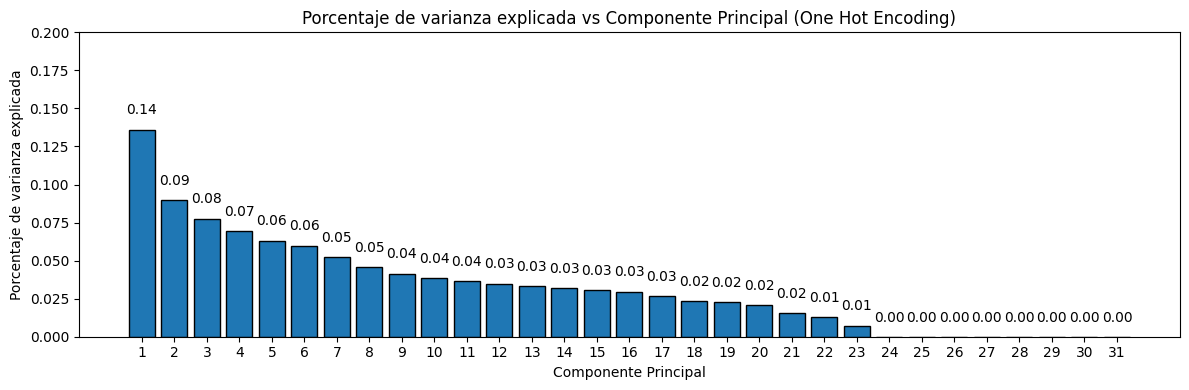

In [144]:
## PCA con One Hot Encoding
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_pipe_oh = make_pipeline(StandardScaler(), PCA())
pca_pipe_oh.fit(df_obesity_oh_enc)

df_obesity_oh_pca = pca_pipe_oh.named_steps['pca']

n_componentes = np.arange(df_obesity_oh_pca.n_components_) + 1
varianza_expl = df_obesity_oh_pca.explained_variance_ratio_

## Determinamos el porcentaje de varianza explicada por las distintas componentes principales y graficamos
n_componentes = np.arange(df_obesity_oh_pca.n_components_) + 1
varianza_expl = df_obesity_oh_pca.explained_variance_ratio_

plt.figure(figsize = (12, 4))
plt.bar(x = n_componentes, height = varianza_expl, edgecolor = 'black')
plt.xticks(ticks = n_componentes)
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl[i] + 0.01, s = f'{varianza_expl[i]:.2f}', ha = 'center')
    
plt.title('Porcentaje de varianza explicada vs Componente Principal (One Hot Encoding)')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()

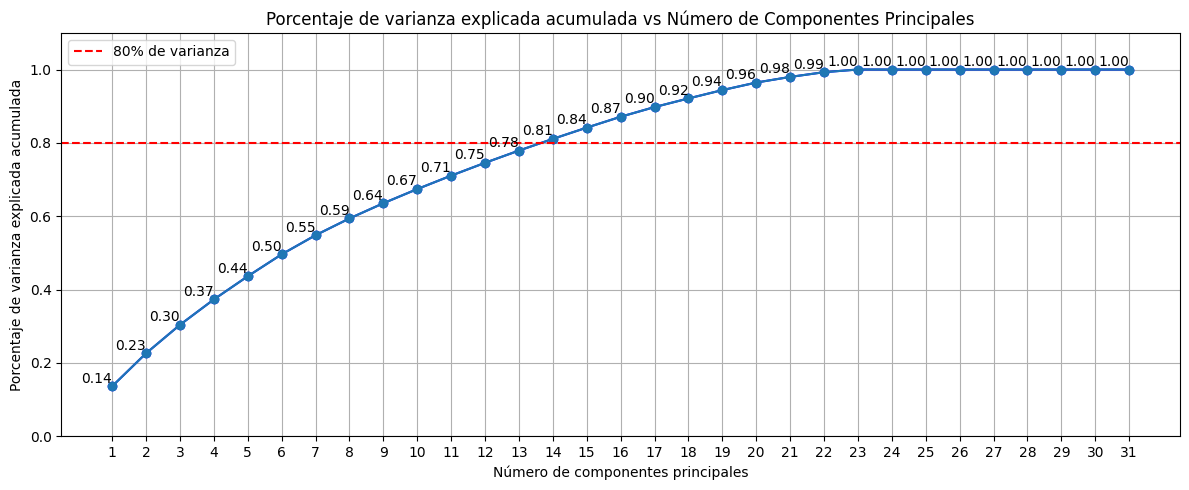

In [124]:
## Determinamos el porcentaje de la varianza explicada acumulada
varianza_expl_acum = df_obesity_oh_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (12, 5))
plt.plot(n_componentes, varianza_expl_acum, marker = 'o', color = 'blue')
plt.plot(range(1, len(varianza_expl_acum)+1), varianza_expl_acum, marker = 'o')
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label = '80% de varianza')
plt.title('Porcentaje de varianza explicada acumulada vs Número de Componentes Principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl_acum[i] + 0.01, s = f'{varianza_expl_acum[i]:.2f}', ha = 'right')

plt.xticks(ticks = n_componentes)
plt.legend()
plt.grid()
plt.ylim([0, 1.1])
plt.tight_layout()
plt.show()

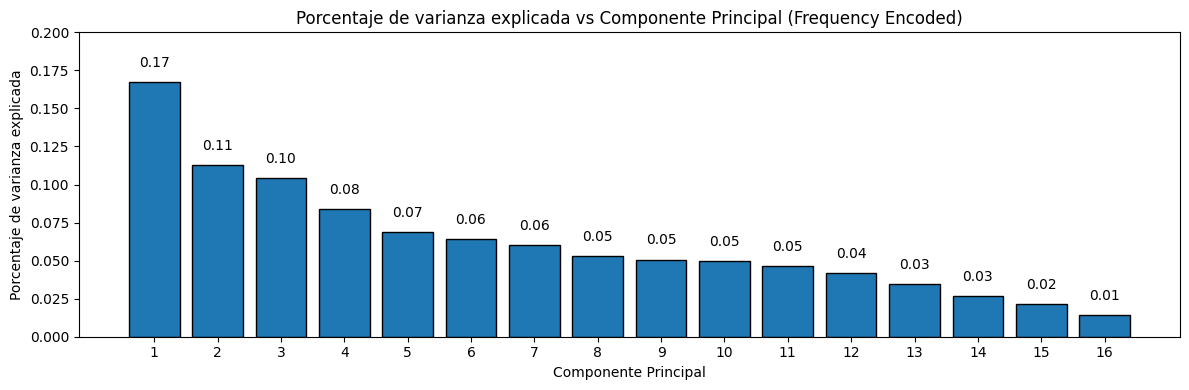

In [146]:
## PCA con Frequency Encoding
pca_pipe_freq = make_pipeline(StandardScaler(), PCA())
pca_pipe_freq.fit(df_obesity_freq_enc)
df_obesity_freq_pca = pca_pipe_freq.named_steps['pca']

n_componentes = np.arange(df_obesity_freq_pca.n_components_) + 1
varianza_expl = df_obesity_freq_pca.explained_variance_ratio_

## Determinamos el porcentaje de varianza explicada por las distintas componentes principales y graficamos
n_componentes = np.arange(df_obesity_freq_pca.n_components_) + 1
varianza_expl = df_obesity_freq_pca.explained_variance_ratio_

plt.figure(figsize = (12, 4))
plt.bar(x = n_componentes, height = varianza_expl, edgecolor = 'black')
plt.xticks(ticks = n_componentes)
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl[i] + 0.01, s = f'{varianza_expl[i]:.2f}', ha = 'center')
    
plt.title('Porcentaje de varianza explicada vs Componente Principal (Frequency Encoded)')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()

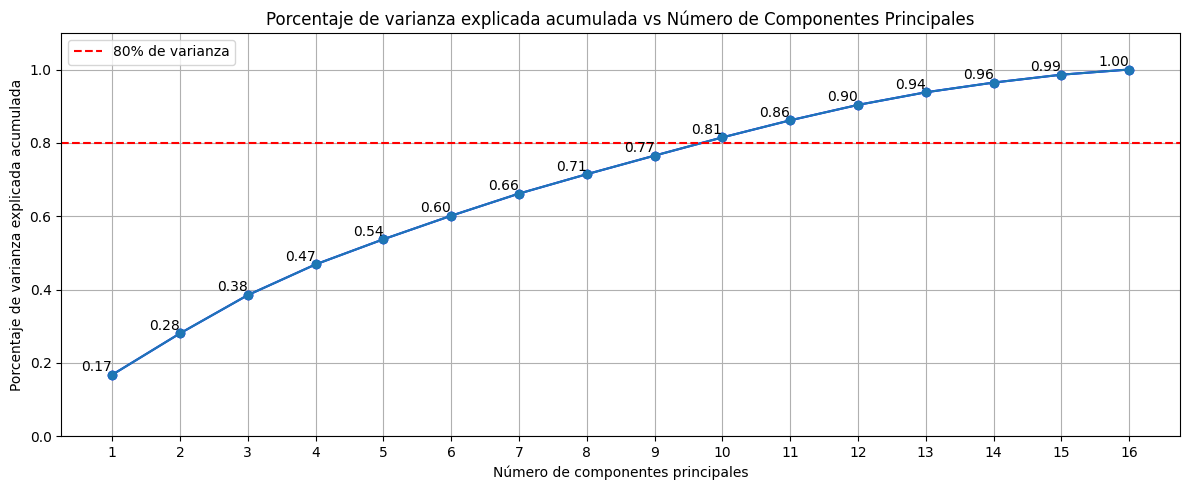

In [126]:
## Determinamos el porcentaje de la varianza explicada acumulada
varianza_expl_acum = df_obesity_freq_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (12, 5))
plt.plot(n_componentes, varianza_expl_acum, marker = 'o', color = 'blue')
plt.plot(range(1, len(varianza_expl_acum)+1), varianza_expl_acum, marker = 'o')
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label = '80% de varianza')
plt.title('Porcentaje de varianza explicada acumulada vs Número de Componentes Principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl_acum[i] + 0.01, s = f'{varianza_expl_acum[i]:.2f}', ha = 'right')

plt.xticks(ticks = n_componentes)
plt.legend()
plt.grid()
plt.ylim([0, 1.1])
plt.tight_layout()
plt.show()

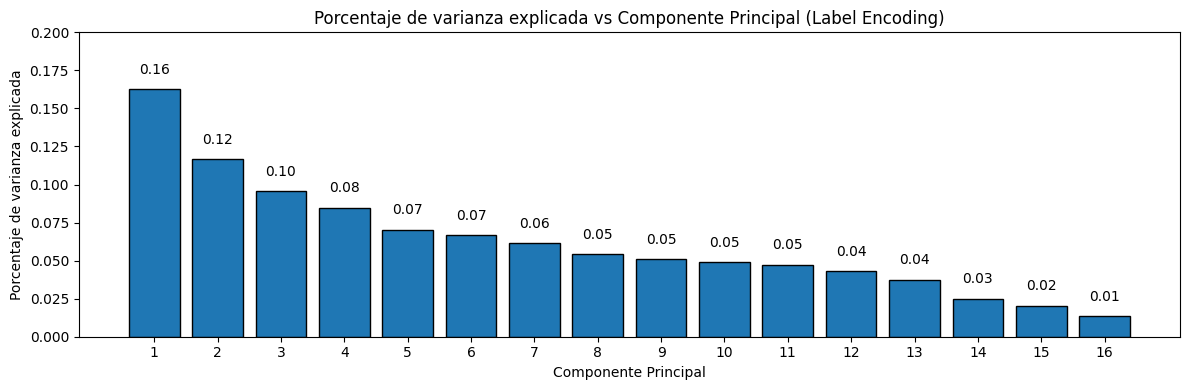

In [150]:
## PCA con Label Encoding
pca_pipe_lab = make_pipeline(StandardScaler(), PCA())
pca_pipe_lab.fit(df_obesity_lab_enc)
df_obesity_lab_pca = pca_pipe_lab.named_steps['pca']

n_componentes = np.arange(df_obesity_lab_pca.n_components_) + 1
varianza_expl = df_obesity_lab_pca.explained_variance_ratio_

## Determinamos el porcentaje de varianza explicada por las distintas componentes principales y graficamos
n_componentes = np.arange(df_obesity_lab_pca.n_components_) + 1
varianza_expl = df_obesity_lab_pca.explained_variance_ratio_

plt.figure(figsize = (12, 4))
plt.bar(x = n_componentes, height = varianza_expl, edgecolor = 'black')
plt.xticks(ticks = n_componentes)
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl[i] + 0.01, s = f'{varianza_expl[i]:.2f}', ha = 'center')
    
plt.title('Porcentaje de varianza explicada vs Componente Principal (Label Encoding)')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()

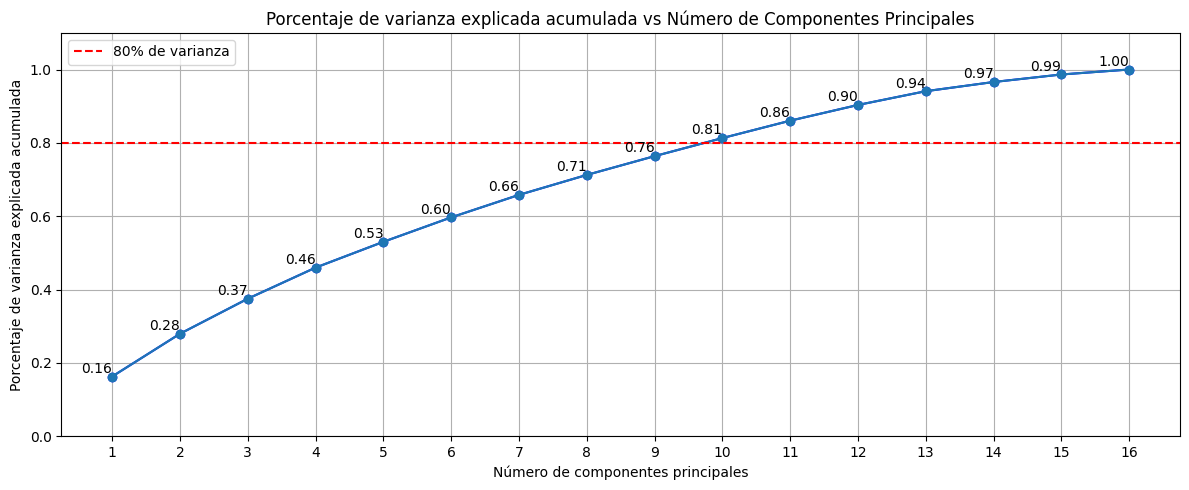

In [115]:
## Determinamos el porcentaje de la varianza explicada acumulada
varianza_expl_acum = df_obesity_lab_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (12, 5))
plt.plot(n_componentes, varianza_expl_acum, marker = 'o', color = 'blue')
plt.plot(range(1, len(varianza_expl_acum)+1), varianza_expl_acum, marker = 'o')
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label = '80% de varianza')
plt.title('Porcentaje de varianza explicada acumulada vs Número de Componentes Principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl_acum[i] + 0.01, s = f'{varianza_expl_acum[i]:.2f}', ha = 'right')

plt.xticks(ticks = n_componentes)
plt.legend()
plt.grid()
plt.ylim([0, 1.1])
plt.tight_layout()
plt.show()

                                          Age    Height    Weight      FCVC  \
Age                                  1.000000 -0.025958  0.202560  0.016291   
Height                              -0.025958  1.000000  0.463136 -0.038121   
Weight                               0.202560  0.463136  1.000000  0.216125   
FCVC                                 0.016291 -0.038121  0.216125  1.000000   
NCP                                 -0.043944  0.243672  0.107469  0.042216   
CH2O                                -0.045304  0.213376  0.200575  0.068461   
FAF                                 -0.144938  0.294709 -0.051436  0.019939   
TUE                                 -0.296931  0.051912 -0.071561 -0.101135   
Gender_freq                          0.048394  0.618466  0.161668 -0.274505   
family_history_with_overweight_freq  0.205725  0.247684  0.496820  0.040372   
FAVC_freq                            0.063902  0.178364  0.272300 -0.027283   
CAEC_freq                            0.143215  0.142

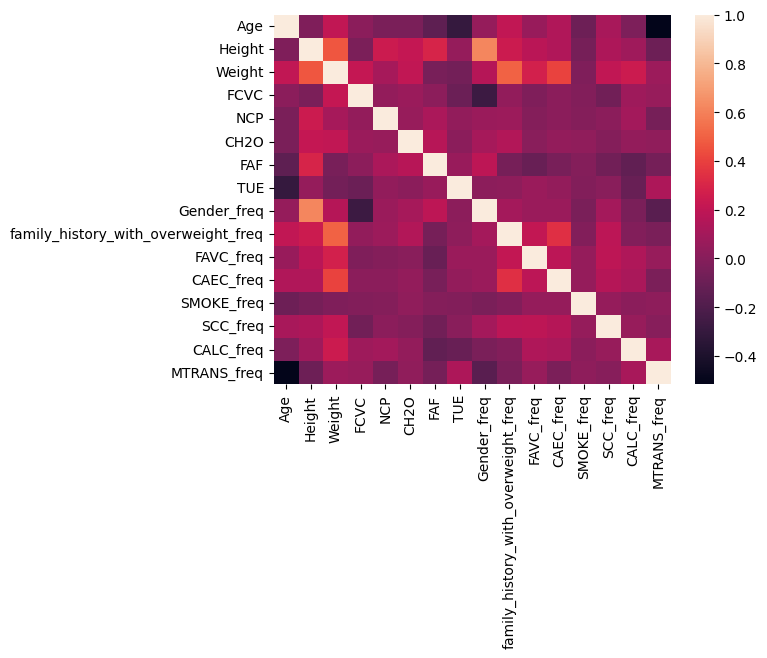

In [137]:
corr_matrix = df_obesity_freq_enc.corr()
print(corr_matrix)
sns.heatmap(corr_matrix)
plt.show()


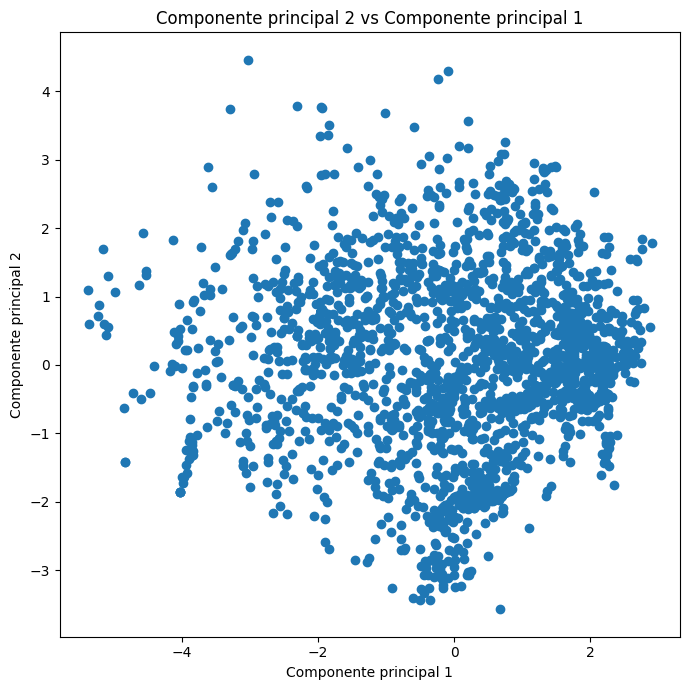

In [153]:
proy_pca_freq = pca_pipe_freq.transform(X = df_obesity_freq_enc)
proy_pca_freq = pd.DataFrame(proy_pca_freq)
proy_pca_oh = pca_pipe_oh.transform(X = df_obesity_oh_enc)
proy_pca_oh = pd.DataFrame(proy_pca_oh)
proy_pca_lab = pca_pipe_lab.transform(X = df_obesity_lab_enc)
proy_pca_lab = pd.DataFrame(proy_pca_lab)

plt.figure(figsize = (7, 7))
plt.scatter(proy_pca_freq[0], proy_pca_freq[1])
plt.title('Componente principal 2 vs Componente principal 1')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.tight_layout()
plt.show()

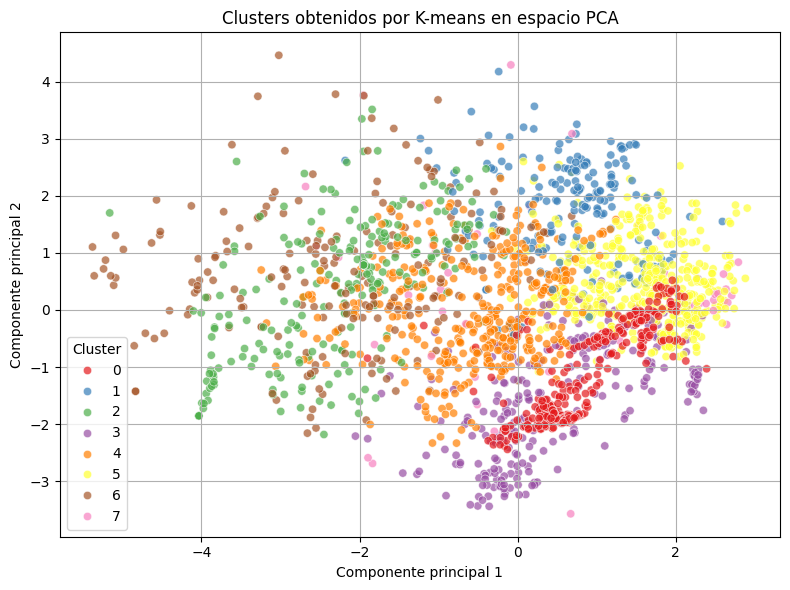

In [156]:
## K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 8, init = "k-means++", n_init = 'auto', max_iter = 1000)
y_pred_kmeans = kmeans.fit(proy_pca_freq[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]])
proy_pca_freq['cluster'] = y_pred_kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x = 0, y = 1, hue = 'cluster', data = proy_pca_freq, palette = 'Set1', alpha = 0.7)

plt.title('Clusters obtenidos por K-means en espacio PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title = 'Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

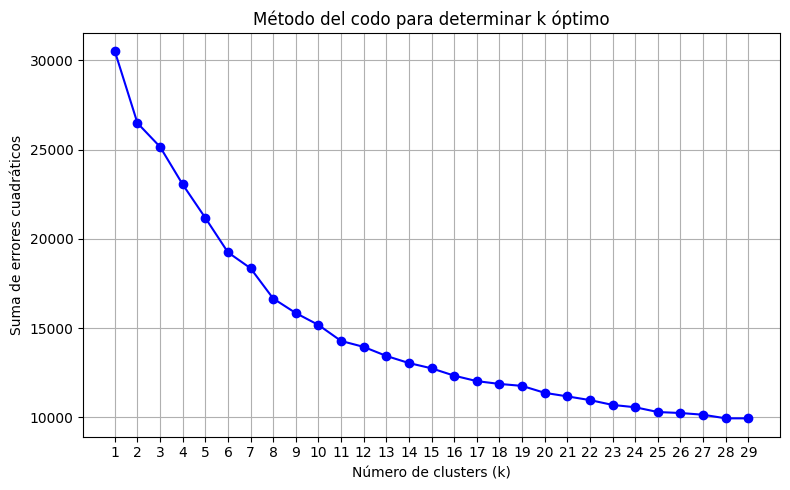

In [139]:
## Método del codo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
k_values = range(1, 30)

for k in k_values:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 'auto', max_iter = 1000, random_state = 42)
    kmeans.fit(proy_pca_freq.iloc[:, :12])
    inertias.append(kmeans.inertia_)

## Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'o-', color='blue')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de errores cuadráticos')
plt.title('Método del codo para determinar k óptimo')
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

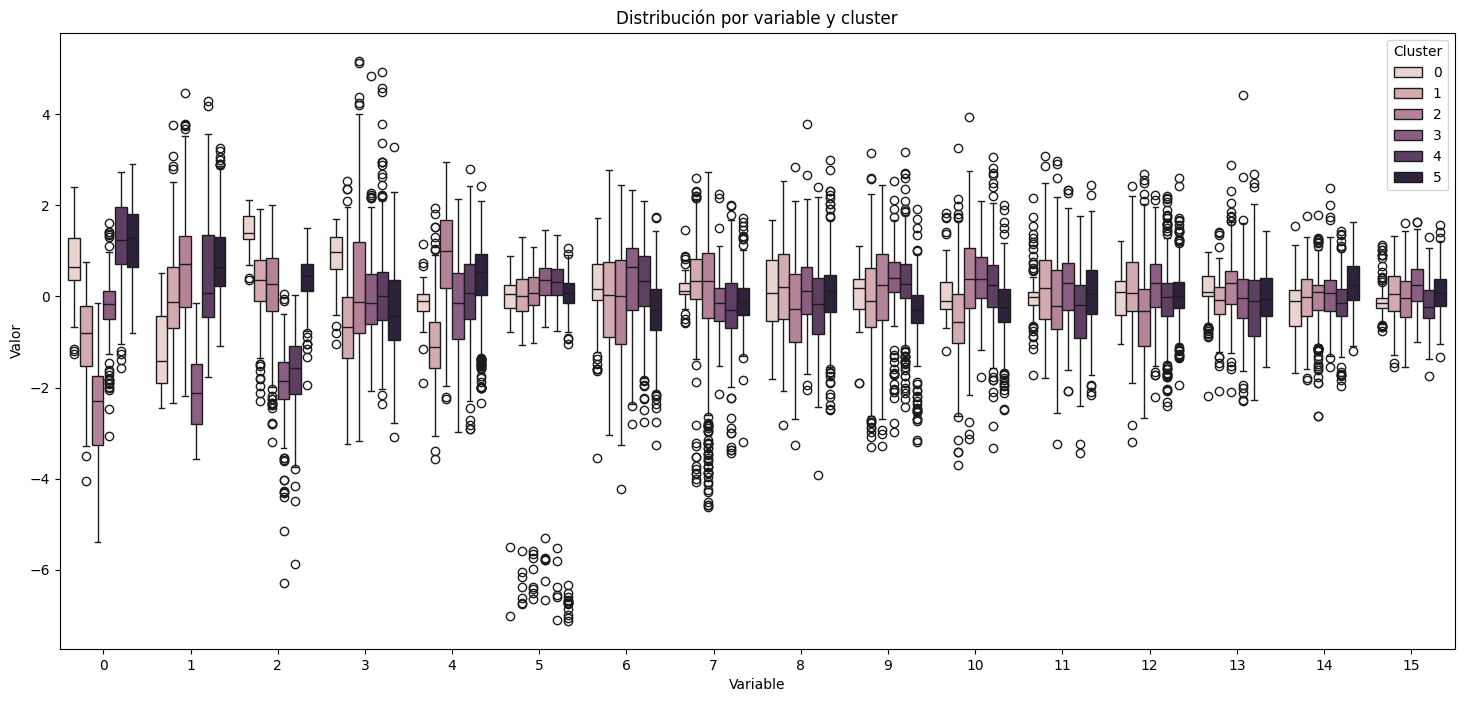

In [ ]:
##Convertir a formato de base de datos
df_melt_km = proy_pca_freq.melt(id_vars = 'cluster', var_name = 'Variable', value_name = 'Valor')

##Creación de boxplot
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'Variable', y = 'Valor', hue = 'cluster', data = df_melt_km)
plt.title('Distribución por variable y cluster')
plt.legend(title = 'Cluster')
plt.show()

In [154]:
df_obesity_oh_enc  ## One Hot Encoding Sin Escalar
df_obesity_freq_enc  ## Frequency Encoding Sin Escalar
df_obesity_lab_enc  ## Label Encoding Sin Escalar
df_obesity_oh_enc_scaled  ## One Hot Encoding Escalado
df_obesity_freq_enc_scaled  ## Frequency Encoding Escalado
df_obesity_lab_enc_scaled  ## Label Encoding Escalado
proy_pca_oh  ## Proyección en Componentes Principales One Hot Encoding
proy_pca_freq  ## Proyección en Componentes Principales Frequency Encoding
proy_pca_lab  ## Proyección en Componentes Principales Label Encoding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.985390,0.013298,0.032592,-0.555247,-0.693531,0.775167,1.006069,0.083426,-2.576890,1.200636,-0.158450,-0.768959,-0.286548,-0.073749,-0.508171,0.428738
1,-2.580052,-0.934175,-0.918585,5.643928,0.311270,-3.276995,5.395184,1.590939,-0.965482,0.472890,1.755270,1.846747,1.163605,-1.061307,0.379007,-0.716195
2,0.494051,-1.769941,-0.962449,0.879784,0.234591,-1.408576,-0.606640,-0.245645,-1.781699,0.213034,-0.210399,-2.377484,1.358512,-0.615373,0.355512,0.462105
3,-0.230795,-1.285581,-0.664863,2.592898,-0.167335,-1.965984,-1.607571,-2.037413,-1.031548,-0.490197,0.411841,-1.952817,-0.209087,0.507929,0.874568,0.530730
4,-1.052339,-0.112508,-0.928199,-0.220853,-0.874868,-2.678076,-0.359041,-2.332814,-0.835356,0.610714,-1.089944,-1.446901,-1.030125,0.709639,-0.991217,0.257410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.752075,-0.390290,1.813514,0.749147,0.267938,0.679501,0.011802,-0.146820,0.401957,-0.276588,0.875307,-0.636196,0.696019,0.505955,-0.394703,-0.431472
2107,1.100251,-0.207288,1.832945,0.969868,0.103941,0.484533,-0.132759,-0.330536,0.248847,-0.093427,0.548067,-0.271010,0.441914,0.553047,-0.561568,-0.121673
2108,1.153122,-0.249325,1.800013,0.996381,0.067687,0.492977,-0.102980,-0.257659,0.249784,-0.169792,0.521760,-0.297277,0.453514,0.610063,-0.515247,-0.079081
2109,1.395687,-0.154831,1.987214,1.260073,-0.430991,0.222072,-0.102476,0.190244,-0.227230,-0.376473,-0.173752,0.212531,0.045473,0.714373,-0.352682,-0.049923
